# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [3]:
import pickle
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import cv2
from matplotlib.gridspec import GridSpec
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle
import itertools

In [4]:
# Load pickled data

# TODO: Fill this in based on where you saved the training and testing data

training_file   = './traffic-signs-data/train.p'
validation_file = './traffic-signs-data/valid.p'
testing_file    = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [39]:

### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_test[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train)) # assuming labels of all classes are included in the training set which is usually the case

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

# load the labels -> name mapping
fname = './signnames.csv'
signames = pd.read_csv(fname)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [6]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.


def show_images(dataset, labels, signames, num_images=16, title="Sampled Images"):
    '''
    Simple function to randomly sample images from the dataset and display the images
    Inputs are: [1] dataset of the images [2] labels: Corresponding class labels
    [3] signames : mapping from labels-> names [4] num_mages: Number of images to show 
    [5] Title at the top 
    '''
    plt.figure(figsize=(16, 8))
    num_cols = 4 # images per row
    num_rows = int(np.floor(num_images/num_cols))
    cnt = 0
    for i in range(num_rows):
        for j in range(num_cols):
            # randomly select the image number
            indx = np.random.randint(dataset.shape[0])
            cnt += 1
            plt.subplot(num_rows, num_cols, cnt)
            plt.imshow(dataset[indx,:,:,:])
            plt.axis('off')
            label = signames['SignName'].loc[labels[indx]]
            plt.title('{}'.format(label))
            
    plt.suptitle(title)
    plt.show()

def plot_class_ditribution(label, title='Distribution of classes in the dataset', col='r'):
    '''
    Plots the class distribution for training, validation and test set
    '''
    dist = np.bincount(label)
    # plot for training set
    num_classes = len(dist)
    plt.figure(figsize=(16,8))
    plt.bar(np.arange(num_classes), dist, color=col)
    plt.xlabel('Class number', fontsize=18)
    plt.ylabel('data per class', fontsize=18)
    plt.title(title, fontsize=18)
    plt.show()

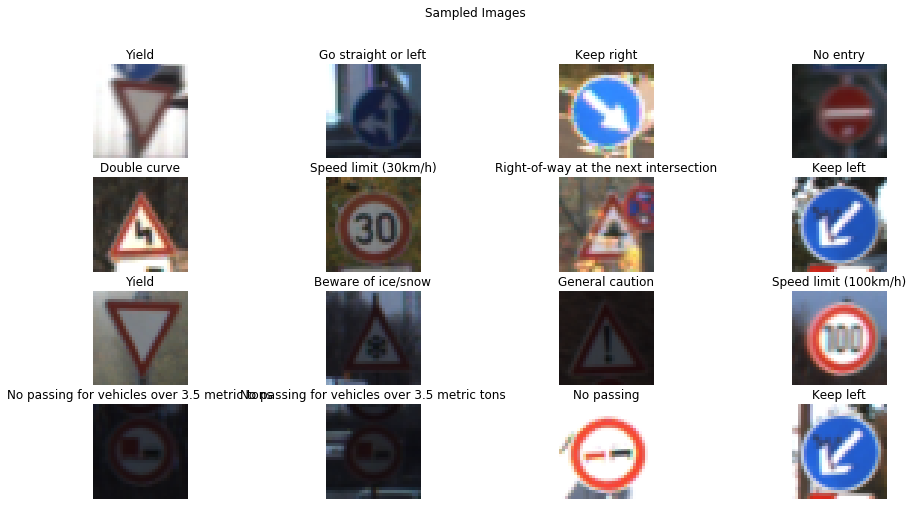

In [4]:
show_images(X_train, y_train, signames)

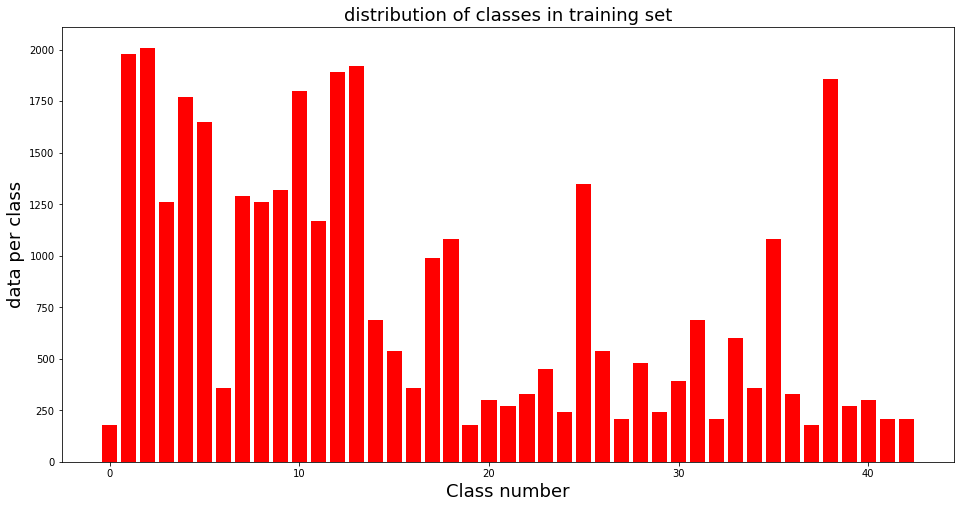

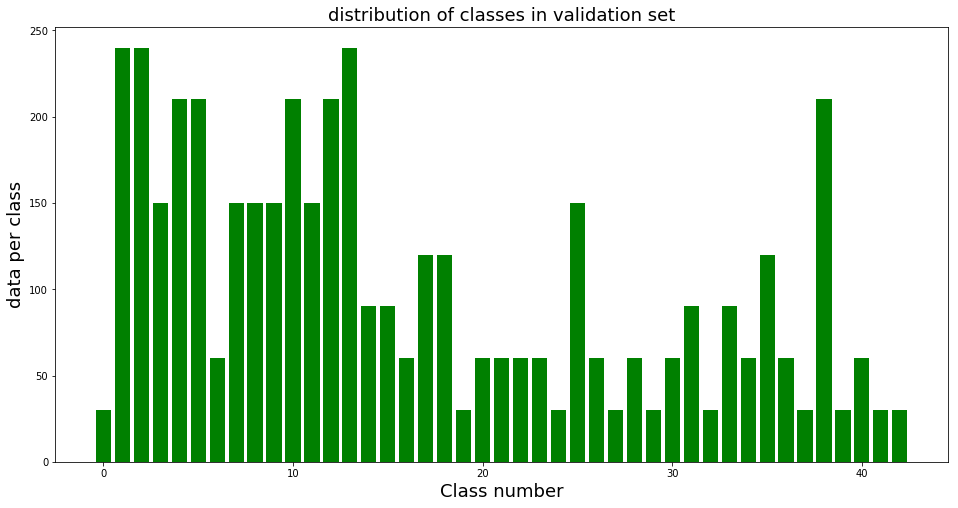

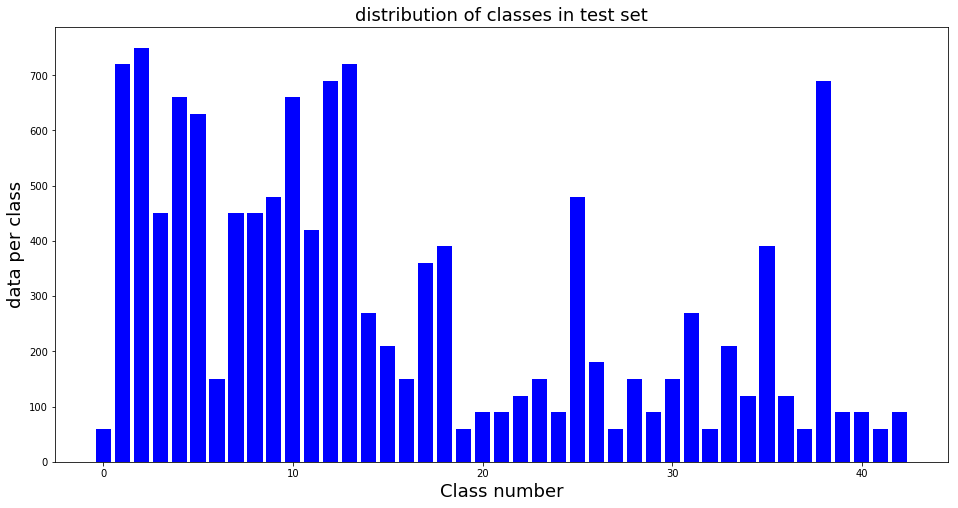

In [5]:
plot_class_ditribution(y_train, 'distribution of classes in training set', 'r')
plot_class_ditribution(y_valid, 'distribution of classes in validation set', 'g')
plot_class_ditribution(y_test, 'distribution of classes in test set', 'b')

### The cell below implements a function to jitter the images in the dataset. It will be helpful in order to augment the already existing datasets in order to incorporate [1] more training examples [2] creating a balanced dataset

In [7]:


def image_jittering(image, angle_range, trans_range, shear_range, brightnessflag=0):
    '''
    Function to create fake dataset by jittering the image
    Inputs are
    [1] the image which needs to be jittered
    [2] range_range : range of angle applied for rotation (deg)
    [3] trans_range : the translational range (in pixels)
    [4] brightnessflag  : flag to jitter the brightness
    
    parameters are sampled from zero mean uniform distribution
    '''
    # set the rotational matrix
    rot_ang = np.random.uniform(angle_range) - angle_range/2
    rows, cols, ch = image.shape
    RotMat = cv2.getRotationMatrix2D((cols/2,rows/2), rot_ang, 1) # rotation applied w.r.t center of the image
    
    # set the translational matrix
    trans_x = np.random.uniform(trans_range+1) - trans_range/2
    trans_y = trans_x
    TransMat = np.float32([[1, 0, trans_x], [0, 1, trans_y]])
    
    # set the shearing matrix 
    # select 3 point in the original image
    pt1 = np.float32([[10, 10], [10, 20], [15, 15]])
    shear_x = shear_range*np.random.uniform() - shear_range/2
    shear_y = shear_range*np.random.uniform() - shear_range/2
    # set the destination points
    pt2     = np.float32([[10+shear_x, 10+shear_y], [10+shear_x, 20+shear_y], [15, 15+shear_y]])
    # get the affine transform matrix
    ShearMat = cv2.getAffineTransform(pt1,pt2)

    
    # implement the transforms
    image = cv2.warpAffine(image, RotMat, (cols,rows))
    image = cv2.warpAffine(image, TransMat, (cols,rows))
    image = cv2.warpAffine(image, ShearMat, (cols,rows))
    
    # change the brightness
    if brightnessflag==1:
        # convert to HSV
        image = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
        # randomly set the birghtness parameter
        random_bright = .30 + np.random.uniform() # Note this might create an occlusion in the image if value goes to zero
        # change the V channel
        image[:,:,2] = image[:,:,2]*random_bright
        # convert back to RGB
        image = cv2.cvtColor(image,cv2.COLOR_HSV2RGB)
        
    return image



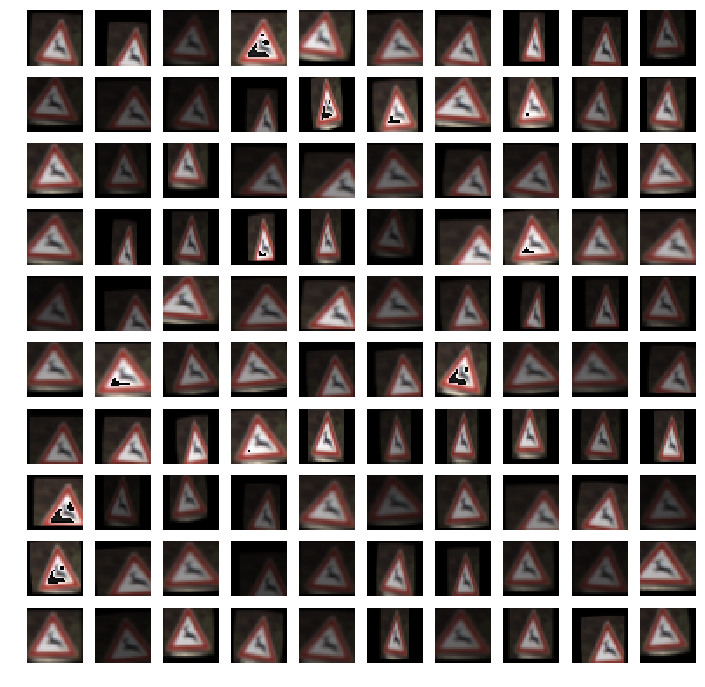

In [9]:
# Test the image_jittering function    
# set the gridspec
image = X_train[500]
gs = GridSpec(10, 10, hspace=0.2, wspace=0.2)
plt.figure(figsize=(12,12))
for i in range(100):
    ax1 = plt.subplot(gs[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    img = image_jittering(image, 20, 10, 5, brightnessflag=1)

    plt.subplot(10,10,i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [8]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
def normalize_features(data, norm_mode=0):
    mean = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    maxval = np.max(data)
    minval = np.min(data)
    # If norm_mode is 0, do 1 sigma normalization else do max-min norm
    if norm_mode==1:
        norm_data = (data - mean)/ sigma
    else:
        norm_data = (data - mean)/(maxval - minval)   
    return norm_data


In [9]:
X_train = normalize_features(X_train)
X_valid = normalize_features(X_valid)
X_test  = normalize_features(X_test)

### Model Architecture

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.


num_classes = 43

#Placeholders
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
rate = tf.placeholder(tf.float32, None)
reg_param = tf.placeholder(tf.float32, None)
one_hot_y = tf.one_hot(y, num_classes)

# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
mu = 0
sigma = 0.1

with tf.name_scope('conv1_layer'):
    #Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_w = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.bias_add(tf.nn.conv2d(x, conv1_w, strides=[1, 1, 1, 1], padding='VALID'), conv1_b)
    #Activation.
    conv1   = tf.nn.relu(conv1)
    # MAX Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1   = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

with tf.name_scope('conv2_layer'):
    #Layer 2: Convolutional. Input = 14x14x6. Output = 10x10x16.
    conv2_w = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.bias_add(tf.nn.conv2d(conv1, conv2_w, strides=[1, 1, 1, 1], padding='VALID'), conv2_b)    
    # Activation.
    conv2   = tf.nn.relu(conv2)
    # MAX Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2   = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

with tf.name_scope('FC1_layer'):
    # Flatten. Input = 5x5x16. Output = 400.
    fc0     = flatten(conv2)
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_w   = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b   = tf.Variable(tf.zeros(120))
    fc1     = tf.add(tf.matmul(fc0, fc1_w), fc1_b)
    # Activation.
    fc1     = tf.nn.relu(fc1)

with tf.name_scope('FC2_layer'):
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_w   = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b   = tf.Variable(tf.zeros(84))
    fc2     = tf.add(tf.matmul(fc1, fc2_w), fc2_b)
    # Activation.
    fc2     = tf.nn.relu(fc2)

with tf.name_scope('SOFTMAX'):
    # Layer 5: Fully Connected. Input = 84. Output = num_classes.
    fc3_w   = tf.Variable(tf.truncated_normal(shape=(84, num_classes), mean = mu, stddev = sigma))
    fc3_b   = tf.Variable(tf.zeros(num_classes))
    logits  = tf.add(tf.matmul(fc2, fc3_w), fc3_b)
    


In [10]:
# create function to regularize the weights
def weight_regularization(weights, reg_param):
    reg_cost = 0.0
    for w in weights:
        reg_cost += reg_param*tf.nn.l2_loss(w)
    return reg_cost

### Training Pipeline

In [13]:
weights = [conv1_w, conv2_w, fc1_w, fc2_w, fc3_w]
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy) + weight_regularization(weights, reg_param)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Evaluation Pipeline

In [14]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data, r, reg):
    num_examples = len(X_data)
    total_loss, total_accuracy = 0, 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss, accuracy = sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y, rate: r, reg_param: reg })
        total_accuracy += (accuracy * len(batch_x))
        total_loss     += (loss * len(batch_x))
    return total_accuracy / num_examples, total_loss / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [ ]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    EPOCHS = 5
    BATCH_SIZE = 128
    
    learn_rate = [1e-2, 1e-3] #[1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
    reg_parameter = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2] #[1e-2, 1e-4, 1e-6]
    # choose the best hyperparameter based on coarse search
    #learn_rate = [1e-2]
    #reg_parameter = [1e-2]
    
    print("Training...")
    print()
    acc_history = {}
    best_val_acc = -1
    best_reg_param = None
    best_learning_rate = None
    valacc, val_loss, trainacc, tr_loss = [], [], [], []
    
    for r,reg in itertools.product(learn_rate,reg_parameter):
        print("learning rate {}, reg parameter {}".format(r,reg))
        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                #print(batch_y.shape)
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, rate: r, reg_param: reg })
            
            # compute summary every 1 epochs
            if (i%1)==0 :
                validation_accuracy, valid_loss = evaluate(X_valid, y_valid, r, reg)
                training_accuracy, train_loss   = evaluate(X_train, y_train, r, reg)
                valacc.append(validation_accuracy)
                val_loss.append(valid_loss)
                trainacc.append(training_accuracy)
                tr_loss.append(train_loss)
                print()
                print("Validation Accuracy = {:.3f}".format(validation_accuracy))
                print("Training Accuracy = {:.3f}".format(training_accuracy))
                print("Validation Loss = {:.3f}".format(valid_loss))
                print("Training Loss = {:.3f}".format(train_loss))
                acc_history[(r,reg)] = (training_accuracy, validation_accuracy, valid_loss, train_loss)
                if validation_accuracy > best_val_acc:
                    best_learning_rate = r
                    best_reg_param     = reg
                    best_val_acc       = validation_accuracy
                
                
        
        
    saver.save(sess, './TrafficSignClassifierNet1')
    print("Model saved")
    
   
# Print out results.
for r, reg in sorted(acc_history):
    train_accuracy, val_accuracy, valid_loss, train_loss = acc_history[(r, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f validation loss: %f train loss %f' % (r, reg, train_accuracy, val_accuracy, valid_loss, \
                                                                        train_loss))
print("Best validation accuracy = {:.3f}".format(best_val_acc))
print("Corresponding Learning rate, reg_params {},{}".format(best_learning_rate, best_reg_param))



Training...

learning rate 0.01, reg parameter 1e-06

Validation Accuracy = 0.791
Training Accuracy = 0.891
Validation Loss = 0.830
Training Loss = 0.368

Validation Accuracy = 0.869
Training Accuracy = 0.944
Validation Loss = 0.523
Training Loss = 0.182

Validation Accuracy = 0.859
Training Accuracy = 0.950
Validation Loss = 0.688
Training Loss = 0.160

Validation Accuracy = 0.851
Training Accuracy = 0.955
Validation Loss = 0.773
Training Loss = 0.144

Validation Accuracy = 0.880
Training Accuracy = 0.960
Validation Loss = 0.573
Training Loss = 0.133
learning rate 0.01, reg parameter 1e-05

Validation Accuracy = 0.878
Training Accuracy = 0.958
Validation Loss = 0.668
Training Loss = 0.152

Validation Accuracy = 0.875
Training Accuracy = 0.950
Validation Loss = 0.698
Training Loss = 0.203

Validation Accuracy = 0.820
Training Accuracy = 0.918
Validation Loss = 0.933
Training Loss = 0.341

Validation Accuracy = 0.894
Training Accuracy = 0.970
Validation Loss = 0.747
Training Loss = 0.13

In [ ]:
# Based on TrafficSignClassifierNet (biases initialized to 0 with Relu activation, Epochs=5, Batch_size=128), initial search for 
# hyperparameters (learning rate and regularization parameter) indicates 1e-3, 1e-3 to be good starting choice
Training...

learning rate 0.01, reg parameter 1e-06

Validation Accuracy = 0.791
Training Accuracy = 0.891
Validation Loss = 0.830
Training Loss = 0.368

Validation Accuracy = 0.869
Training Accuracy = 0.944
Validation Loss = 0.523
Training Loss = 0.182

Validation Accuracy = 0.859
Training Accuracy = 0.950
Validation Loss = 0.688
Training Loss = 0.160

Validation Accuracy = 0.851
Training Accuracy = 0.955
Validation Loss = 0.773
Training Loss = 0.144

Validation Accuracy = 0.880
Training Accuracy = 0.960
Validation Loss = 0.573
Training Loss = 0.133
learning rate 0.01, reg parameter 1e-05

Validation Accuracy = 0.878
Training Accuracy = 0.958
Validation Loss = 0.668
Training Loss = 0.152

Validation Accuracy = 0.875
Training Accuracy = 0.950
Validation Loss = 0.698
Training Loss = 0.203

Validation Accuracy = 0.820
Training Accuracy = 0.918
Validation Loss = 0.933
Training Loss = 0.341

Validation Accuracy = 0.894
Training Accuracy = 0.970
Validation Loss = 0.747
Training Loss = 0.130

Validation Accuracy = 0.867
Training Accuracy = 0.967
Validation Loss = 0.811
Training Loss = 0.133
learning rate 0.01, reg parameter 0.0001

Validation Accuracy = 0.891
Training Accuracy = 0.963
Validation Loss = 0.849
Training Loss = 0.322

Validation Accuracy = 0.871
Training Accuracy = 0.952
Validation Loss = 0.987
Training Loss = 0.342

Validation Accuracy = 0.882
Training Accuracy = 0.976
Validation Loss = 0.799
Training Loss = 0.242

Validation Accuracy = 0.877
Training Accuracy = 0.963
Validation Loss = 0.718
Training Loss = 0.283
learning rate 0.01, reg parameter 0.001

Validation Accuracy = 0.890
Training Accuracy = 0.976
Validation Loss = 0.960
Training Loss = 0.593

Validation Accuracy = 0.912
Training Accuracy = 0.973
Validation Loss = 0.706
Training Loss = 0.436

Validation Accuracy = 0.890
Training Accuracy = 0.972
Validation Loss = 0.721
Training Loss = 0.394

Validation Accuracy = 0.895
Training Accuracy = 0.972
Validation Loss = 0.718
Training Loss = 0.380

Validation Accuracy = 0.880
Training Accuracy = 0.961
Validation Loss = 0.744
Training Loss = 0.389
learning rate 0.01, reg parameter 0.01

Validation Accuracy = 0.831
Training Accuracy = 0.907
Validation Loss = 1.424
Training Loss = 1.228

Validation Accuracy = 0.855
Training Accuracy = 0.908
Validation Loss = 1.315
Training Loss = 1.149

Validation Accuracy = 0.807
Training Accuracy = 0.885
Validation Loss = 1.373
Training Loss = 1.142

Validation Accuracy = 0.815
Training Accuracy = 0.888
Validation Loss = 1.358
Training Loss = 1.134

Validation Accuracy = 0.854
Training Accuracy = 0.920
Validation Loss = 1.180
Training Loss = 0.997
learning rate 0.001, reg parameter 1e-06

Validation Accuracy = 0.903
Training Accuracy = 0.973
Validation Loss = 0.346
Training Loss = 0.125

Validation Accuracy = 0.896
Training Accuracy = 0.978
Validation Loss = 0.352
Training Loss = 0.098

Validation Accuracy = 0.904
Training Accuracy = 0.983
Validation Loss = 0.359
Training Loss = 0.077

Validation Accuracy = 0.903
Training Accuracy = 0.982
Validation Loss = 0.396
Training Loss = 0.075

Validation Accuracy = 0.909
Training Accuracy = 0.987
Validation Loss = 0.344
Training Loss = 0.056
learning rate 0.001, reg parameter 1e-05

Validation Accuracy = 0.908
Training Accuracy = 0.990
Validation Loss = 0.361
Training Loss = 0.046

Validation Accuracy = 0.906
Training Accuracy = 0.993
Validation Loss = 0.379
Training Loss = 0.037

Validation Accuracy = 0.902
Training Accuracy = 0.992
Validation Loss = 0.415
Training Loss = 0.037

Validation Accuracy = 0.906
Training Accuracy = 0.993
Validation Loss = 0.407
Training Loss = 0.032

Validation Accuracy = 0.917
Training Accuracy = 0.995
Validation Loss = 0.366
Training Loss = 0.028
learning rate 0.001, reg parameter 0.0001

Validation Accuracy = 0.913
Training Accuracy = 0.994
Validation Loss = 0.427
Training Loss = 0.039

Validation Accuracy = 0.905
Training Accuracy = 0.994
Validation Loss = 0.475
Training Loss = 0.037

Validation Accuracy = 0.907
Training Accuracy = 0.995
Validation Loss = 0.441
Training Loss = 0.036

Validation Accuracy = 0.910
Training Accuracy = 0.995
Validation Loss = 0.432
Training Loss = 0.034

Validation Accuracy = 0.904
Training Accuracy = 0.997
Validation Loss = 0.595
Training Loss = 0.157

Validation Accuracy = 0.918
Training Accuracy = 0.998
Validation Loss = 0.496
Training Loss = 0.148

Validation Accuracy = 0.912
Training Accuracy = 0.995
Validation Loss = 0.509
Training Loss = 0.151

Validation Accuracy = 0.913
Training Accuracy = 0.995
Validation Loss = 0.463
Training Loss = 0.149

Validation Accuracy = 0.907
Training Accuracy = 0.997
Validation Loss = 0.500
Training Loss = 0.142
learning rate 0.001, reg parameter 0.01

Validation Accuracy = 0.882
Training Accuracy = 0.976
Validation Loss = 1.157
Training Loss = 0.891

Validation Accuracy = 0.907
Training Accuracy = 0.973
Validation Loss = 1.050
Training Loss = 0.837

Validation Accuracy = 0.909
Training Accuracy = 0.964
Validation Loss = 1.018
Training Loss = 0.820

Validation Accuracy = 0.894
Training Accuracy = 0.963
Validation Loss = 1.040
Training Loss = 0.806

Validation Accuracy = 0.888
Training Accuracy = 0.966
Validation Loss = 1.024
Training Loss = 0.803
Model saved
lr 1.000000e-03 reg 1.000000e-06 train accuracy: 0.986982 val accuracy: 0.909297 validation loss: 0.344414 train loss 0.056311
lr 1.000000e-03 reg 1.000000e-05 train accuracy: 0.994655 val accuracy: 0.917007 validation loss: 0.366340 train loss 0.028108
lr 1.000000e-03 reg 1.000000e-04 train accuracy: 0.995891 val accuracy: 0.907029 validation loss: 0.480188 train loss 0.030858
lr 1.000000e-03 reg 1.000000e-03 train accuracy: 0.997356 val accuracy: 0.907256 validation loss: 0.499576 train loss 0.142293
lr 1.000000e-03 reg 1.000000e-02 train accuracy: 0.965660 val accuracy: 0.887755 validation loss: 1.024432 train loss 0.803273
lr 1.000000e-02 reg 1.000000e-06 train accuracy: 0.959798 val accuracy: 0.879819 validation loss: 0.572551 train loss 0.132841
lr 1.000000e-02 reg 1.000000e-05 train accuracy: 0.967269 val accuracy: 0.867120 validation loss: 0.811097 train loss 0.133427
lr 1.000000e-02 reg 1.000000e-04 train accuracy: 0.962844 val accuracy: 0.876871 validation loss: 0.718211 train loss 0.283088
lr 1.000000e-02 reg 1.000000e-03 train accuracy: 0.961349 val accuracy: 0.879592 validation loss: 0.744243 train loss 0.388730
lr 1.000000e-02 reg 1.000000e-02 train accuracy: 0.920429 val accuracy: 0.853968 validation loss: 1.180019 train loss 0.997010
Best validation accuracy = 0.918
Corresponding Learning rate, reg_params 0.001,0.001

#### Train again for small number of epochs with elu activation (so that more neurons are alive at the starting of the training with the above hyperparameter choice)

In [11]:
# Use ELU activation


num_classes = 43
def TrafficSignClassifierNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    with tf.name_scope('conv1_layer'):
        #Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
        conv1_w = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
        conv1_b = tf.Variable(tf.zeros(6))
        conv1   = tf.nn.bias_add(tf.nn.conv2d(x, conv1_w, strides=[1, 1, 1, 1], padding='VALID'), conv1_b)
        #Activation.
        conv1   = tf.nn.elu(conv1)
        # MAX Pooling. Input = 28x28x6. Output = 14x14x6.
        conv1   = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    with tf.name_scope('conv2_layer'):
        #Layer 2: Convolutional. Input = 14x14x6. Output = 10x10x16.
        conv2_w = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
        conv2_b = tf.Variable(tf.zeros(16))
        conv2   = tf.nn.bias_add(tf.nn.conv2d(conv1, conv2_w, strides=[1, 1, 1, 1], padding='VALID'), conv2_b)    
        # Activation.
        conv2   = tf.nn.elu(conv2)
        # MAX Pooling. Input = 10x10x16. Output = 5x5x16.
        conv2   = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    with tf.name_scope('FC1_layer'):
        # Flatten. Input = 5x5x16. Output = 400.
        fc0     = flatten(conv2)
        # Layer 3: Fully Connected. Input = 400. Output = 120.
        fc1_w   = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
        fc1_b   = tf.Variable(tf.zeros(120))
        fc1     = tf.add(tf.matmul(fc0, fc1_w), fc1_b)
        # Activation.
        fc1     = tf.nn.elu(fc1)
        
    with tf.name_scope('FC2_layer'):
        # Layer 4: Fully Connected. Input = 120. Output = 84.
        fc2_w   = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
        fc2_b   = tf.Variable(tf.zeros(84))
        fc2     = tf.add(tf.matmul(fc1, fc2_w), fc2_b)
        # Activation.
        fc2     = tf.nn.elu(fc2)
        
    with tf.name_scope('SOFTMAX'):
        # Layer 5: Fully Connected. Input = 84. Output = num_classes.
        fc3_w   = tf.Variable(tf.truncated_normal(shape=(84, num_classes), mean = mu, stddev = sigma))
        fc3_b   = tf.Variable(tf.zeros(num_classes))
        logits  = tf.add(tf.matmul(fc2, fc3_w), fc3_b)
    
    return logits, [conv1_w, conv2_w, fc1_w, fc2_w, fc3_w]

# create function to regularize the weights
def weight_regularization(weights, reg_param):
    reg_cost = 0.0
    for w in weights:
        reg_cost += reg_param*tf.nn.l2_loss(w)
    return reg_cost

# placeholders
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
rate = tf.placeholder(tf.float32, None)
reg_param = tf.placeholder(tf.float32, None)
one_hot_y = tf.one_hot(y, num_classes)

# training pipeline
logits, weights = TrafficSignClassifierNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy) + weight_regularization(weights, reg_param)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# evaluation pipeline
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data, r, reg):
    num_examples = len(X_data)
    total_loss, total_accuracy = 0, 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss, accuracy = sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y, rate: r, reg_param: reg })
        total_accuracy += (accuracy * len(batch_x))
        total_loss     += (loss * len(batch_x))
    return total_accuracy / num_examples, total_loss / num_examples

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    EPOCHS = 100
    BATCH_SIZE = 128
    
    #learn_rate = [1e-2, 1e-3] #[1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
    #reg_parameter = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2] #[1e-2, 1e-4, 1e-6]
    # choose the best hyperparameter based on coarse search
    learn_rate = [1e-3]
    reg_parameter = [1e-3]
    
    print("Training...")
    print()
    valacc, val_loss, trainacc, tr_loss = [], [], [], []
    
    for r,reg in itertools.product(learn_rate,reg_parameter):
        print("learning rate {}, reg parameter {}".format(r,reg))
        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                #print(batch_y.shape)
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, rate: r, reg_param: reg })
            
            # compute summary every 1 epochs
            if (i%1)==0 :
                validation_accuracy, valid_loss = evaluate(X_valid, y_valid, r, reg)
                training_accuracy, train_loss   = evaluate(X_train, y_train, r, reg)
                valacc.append(validation_accuracy)
                val_loss.append(valid_loss)
                trainacc.append(training_accuracy)
                tr_loss.append(train_loss)
                print()
                print("Validation Accuracy = {:.3f}".format(validation_accuracy))
                print("Training Accuracy = {:.3f}".format(training_accuracy))
                print("Validation Loss = {:.3f}".format(valid_loss))
                print("Training Loss = {:.3f}".format(train_loss))
                
                
                
        
        
    saver.save(sess, './TrafficSignClassifierNet')
    print("Model saved")
    
plt.figure(figsize=(12,12))
plt.plot(trainacc,'r',label='train_acc')
plt.plot(valacc,'b',label='validation_acc')
plt.xlabel('Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(12,12))
plt.plot(tr_loss,'r',label='train_loss')
plt.plot(val_loss,'b',label='validation_loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()   



Training...

learning rate 0.001, reg parameter 0.001

Validation Accuracy = 0.756
Training Accuracy = 0.865
Validation Loss = 1.065
Training Loss = 0.739

Validation Accuracy = 0.810
Training Accuracy = 0.931
Validation Loss = 0.864
Training Loss = 0.506

Validation Accuracy = 0.854
Training Accuracy = 0.957
Validation Loss = 0.802
Training Loss = 0.410

Validation Accuracy = 0.879
Training Accuracy = 0.974
Validation Loss = 0.659
Training Loss = 0.349

Validation Accuracy = 0.875
Training Accuracy = 0.979
Validation Loss = 0.647
Training Loss = 0.316

Validation Accuracy = 0.883
Training Accuracy = 0.980
Validation Loss = 0.620
Training Loss = 0.294

Validation Accuracy = 0.873
Training Accuracy = 0.983
Validation Loss = 0.660
Training Loss = 0.275

Validation Accuracy = 0.878
Training Accuracy = 0.989
Validation Loss = 0.635
Training Loss = 0.244

Validation Accuracy = 0.890
Training Accuracy = 0.983
Validation Loss = 0.582
Training Loss = 0.244

Validation Accuracy = 0.901
Training

KeyboardInterrupt: 

In [ ]:
# Training the LeNet (as above) with ELU activation (lr=0.001, reg=0.001) for ~40 epochs (batch size) seems to give validation 
# accuracy of ~91% with validation cost seems to be hovering around 0.4 to 0.5 with no quick improvement sees as epochs increases
Training...

learning rate 0.001, reg parameter 0.001

Validation Accuracy = 0.756
Training Accuracy = 0.865
Validation Loss = 1.065
Training Loss = 0.739

Validation Accuracy = 0.810
Training Accuracy = 0.931
Validation Loss = 0.864
Training Loss = 0.506

Validation Accuracy = 0.854
Training Accuracy = 0.957
Validation Loss = 0.802
Training Loss = 0.410

Validation Accuracy = 0.879
Training Accuracy = 0.974
Validation Loss = 0.659
Training Loss = 0.349

Validation Accuracy = 0.875
Training Accuracy = 0.979
Validation Loss = 0.647
Training Loss = 0.316

Validation Accuracy = 0.883
Training Accuracy = 0.980
Validation Loss = 0.620
Training Loss = 0.294

Validation Accuracy = 0.873
Training Accuracy = 0.983
Validation Loss = 0.660
Training Loss = 0.275

Validation Accuracy = 0.878
Training Accuracy = 0.989
Validation Loss = 0.635
Training Loss = 0.244

Validation Accuracy = 0.890
Training Accuracy = 0.983
Validation Loss = 0.582
Training Loss = 0.244

Validation Accuracy = 0.901
Training Accuracy = 0.990
Validation Loss = 0.532
Training Loss = 0.223

Validation Accuracy = 0.909
Training Accuracy = 0.992
Validation Loss = 0.513
Training Loss = 0.209

Validation Accuracy = 0.901
Training Accuracy = 0.991
Validation Loss = 0.526
Training Loss = 0.204

Validation Accuracy = 0.903
Training Accuracy = 0.990
Validation Loss = 0.503
Training Loss = 0.200

Validation Accuracy = 0.900
Training Accuracy = 0.993
Validation Loss = 0.492
Training Loss = 0.187

Validation Accuracy = 0.910
Training Accuracy = 0.993
Validation Loss = 0.477
Training Loss = 0.187

Validation Accuracy = 0.889
Training Accuracy = 0.985
Validation Loss = 0.537
Training Loss = 0.205

Validation Accuracy = 0.890
Training Accuracy = 0.991
Validation Loss = 0.525
Training Loss = 0.185

Validation Accuracy = 0.917
Training Accuracy = 0.995
Validation Loss = 0.432
Training Loss = 0.171

Validation Accuracy = 0.931
Training Accuracy = 0.996
Validation Loss = 0.414
Training Loss = 0.163

Validation Accuracy = 0.910
Training Accuracy = 0.994
Validation Loss = 0.469
Training Loss = 0.168

Validation Accuracy = 0.912
Training Accuracy = 0.995
Validation Loss = 0.466
Training Loss = 0.163

Validation Accuracy = 0.901
Training Accuracy = 0.993
Validation Loss = 0.493
Training Loss = 0.166

Validation Accuracy = 0.914
Training Accuracy = 0.996
Validation Loss = 0.455
Training Loss = 0.157

Validation Accuracy = 0.920
Training Accuracy = 0.996
Validation Loss = 0.425
Training Loss = 0.157

Validation Accuracy = 0.901
Training Accuracy = 0.994
Validation Loss = 0.470
Training Loss = 0.162

Validation Accuracy = 0.904
Training Accuracy = 0.996
Validation Loss = 0.469
Training Loss = 0.153

Validation Accuracy = 0.901
Training Accuracy = 0.994
Validation Loss = 0.477
Training Loss = 0.157

Validation Accuracy = 0.920
Training Accuracy = 0.996
Validation Loss = 0.425
Training Loss = 0.150

Validation Accuracy = 0.915
Training Accuracy = 0.994
Validation Loss = 0.453
Training Loss = 0.156

Validation Accuracy = 0.909
Training Accuracy = 0.996
Validation Loss = 0.455
Training Loss = 0.153

Validation Accuracy = 0.922
Training Accuracy = 0.997
Validation Loss = 0.409
Training Loss = 0.147

Validation Accuracy = 0.919
Training Accuracy = 0.997
Validation Loss = 0.431
Training Loss = 0.145

Validation Accuracy = 0.907
Training Accuracy = 0.994
Validation Loss = 0.481
Training Loss = 0.149

Validation Accuracy = 0.906
Training Accuracy = 0.994
Validation Loss = 0.446
Training Loss = 0.150

Validation Accuracy = 0.913
Training Accuracy = 0.997
Validation Loss = 0.452
Training Loss = 0.147

Validation Accuracy = 0.915
Training Accuracy = 0.997
Validation Loss = 0.409
Training Loss = 0.147

Validation Accuracy = 0.916
Training Accuracy = 0.998
Validation Loss = 0.440
Training Loss = 0.140

Validation Accuracy = 0.920
Training Accuracy = 0.995
Validation Loss = 0.446
Training Loss = 0.146

Validation Accuracy = 0.906
Training Accuracy = 0.994
Validation Loss = 0.478
Training Loss = 0.151

Validation Accuracy = 0.901
Training Accuracy = 0.995
Validation Loss = 0.508
Training Loss = 0.149

Validation Accuracy = 0.915
Training Accuracy = 0.996
Validation Loss = 0.428
Training Loss = 0.145

Validation Accuracy = 0.925
Training Accuracy = 0.997
Validation Loss = 0.424
Training Loss = 0.143

Validation Accuracy = 0.913
Training Accuracy = 0.998
Validation Loss = 0.440
Training Loss = 0.136

Validation Accuracy = 0.912
Training Accuracy = 0.998
Validation Loss = 0.429
Training Loss = 0.135

Validation Accuracy = 0.922
Training Accuracy = 0.996
Validation Loss = 0.422
Training Loss = 0.147

Validation Accuracy = 0.906
Training Accuracy = 0.995
Validation Loss = 0.477
Training Loss = 0.144

Validation Accuracy = 0.915
Training Accuracy = 0.998
Validation Loss = 0.448
Training Loss = 0.136

Validation Accuracy = 0.912
Training Accuracy = 0.996
Validation Loss = 0.433
Training Loss = 0.143

Validation Accuracy = 0.916
Training Accuracy = 0.996
Validation Loss = 0.435
Training Loss = 0.143

Validation Accuracy = 0.911
Training Accuracy = 0.996
Validation Loss = 0.446
Training Loss = 0.143

Validation Accuracy = 0.913
Training Accuracy = 0.998
Validation Loss = 0.420
Training Loss = 0.133

Validation Accuracy = 0.917
Training Accuracy = 0.996
Validation Loss = 0.413
Training Loss = 0.141

Validation Accuracy = 0.922
Training Accuracy = 0.997
Validation Loss = 0.392
Training Loss = 0.139

Validation Accuracy = 0.921
Training Accuracy = 0.998
Validation Loss = 0.409
Training Loss = 0.133

Validation Accuracy = 0.911
Training Accuracy = 0.992
Validation Loss = 0.465
Training Loss = 0.144

Validation Accuracy = 0.912
Training Accuracy = 0.994
Validation Loss = 0.487
Training Loss = 0.145

Validation Accuracy = 0.922
Training Accuracy = 0.996
Validation Loss = 0.424
Training Loss = 0.141

Validation Accuracy = 0.909
Training Accuracy = 0.998
Validation Loss = 0.453
Training Loss = 0.136

Validation Accuracy = 0.925
Training Accuracy = 0.996
Validation Loss = 0.399
Training Loss = 0.138

Validation Accuracy = 0.902
Training Accuracy = 0.995
Validation Loss = 0.475
Training Loss = 0.144

Validation Accuracy = 0.910
Training Accuracy = 0.997
Validation Loss = 0.448
Training Loss = 0.134

Validation Accuracy = 0.911
Training Accuracy = 0.999
Validation Loss = 0.443
Training Loss = 0.130

Validation Accuracy = 0.907
Training Accuracy = 0.997
Validation Loss = 0.449
Training Loss = 0.133

Validation Accuracy = 0.918
Training Accuracy = 0.997
Validation Loss = 0.409
Training Loss = 0.134

Validation Accuracy = 0.923
Training Accuracy = 0.996
Validation Loss = 0.404
Training Loss = 0.139

Validation Accuracy = 0.913
Training Accuracy = 0.998
Validation Loss = 0.438
Training Loss = 0.132

Validation Accuracy = 0.917
Training Accuracy = 0.997
Validation Loss = 0.428
Training Loss = 0.133

Validation Accuracy = 0.914
Training Accuracy = 0.996
Validation Loss = 0.440
Training Loss = 0.139

Validation Accuracy = 0.922
Training Accuracy = 0.998
Validation Loss = 0.411
Training Loss = 0.132

Validation Accuracy = 0.920
Training Accuracy = 0.997
Validation Loss = 0.445
Training Loss = 0.135

Validation Accuracy = 0.913
Training Accuracy = 0.997
Validation Loss = 0.459
Training Loss = 0.132

Validation Accuracy = 0.913
Training Accuracy = 0.998
Validation Loss = 0.430
Training Loss = 0.130

Validation Accuracy = 0.915
Training Accuracy = 0.998
Validation Loss = 0.411
Training Loss = 0.131

Validation Accuracy = 0.915
Training Accuracy = 0.998
Validation Loss = 0.418
Training Loss = 0.130

Validation Accuracy = 0.920
Training Accuracy = 0.997
Validation Loss = 0.412
Training Loss = 0.131

Validation Accuracy = 0.915
Training Accuracy = 0.998
Validation Loss = 0.428
Training Loss = 0.130

Validation Accuracy = 0.907
Training Accuracy = 0.997
Validation Loss = 0.460
Training Loss = 0.134

Validation Accuracy = 0.918
Training Accuracy = 0.994
Validation Loss = 0.433
Training Loss = 0.137

Validation Accuracy = 0.919
Training Accuracy = 0.999
Validation Loss = 0.415
Training Loss = 0.125

Validation Accuracy = 0.912
Training Accuracy = 0.995
Validation Loss = 0.445
Training Loss = 0.137

Validation Accuracy = 0.911
Training Accuracy = 0.997
Validation Loss = 0.439
Training Loss = 0.132

#### Add drop out regularization to LeNet with ELU activation in order to reduce overfittings as well as get ensemble gain from the network

In [13]:
# drop out with ELU activation
### Define your architecture here.
### Feel free to use as many code cells as needed.


num_classes = 43

#Placeholders
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_probability = tf.placeholder(tf.float32)
rate = tf.placeholder(tf.float32, None)
reg_param = tf.placeholder(tf.float32, None)
one_hot_y = tf.one_hot(y, num_classes)

# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
mu = 0
sigma = 0.1

with tf.name_scope('conv1_layer'):
    #Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_w = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.bias_add(tf.nn.conv2d(x, conv1_w, strides=[1, 1, 1, 1], padding='VALID'), conv1_b)
    #Activation.
    conv1   = tf.nn.elu(conv1)
    # drop out layer
    conv1   = tf.nn.dropout(conv1, keep_probability)
    # MAX Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1   = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

with tf.name_scope('conv2_layer'):
    #Layer 2: Convolutional. Input = 14x14x6. Output = 10x10x16.
    conv2_w = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.bias_add(tf.nn.conv2d(conv1, conv2_w, strides=[1, 1, 1, 1], padding='VALID'), conv2_b)    
    # Activation.
    conv2   = tf.nn.elu(conv2)
    # drop out layer
    conv2   = tf.nn.dropout(conv2, keep_probability)
    # MAX Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2   = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

with tf.name_scope('FC1_layer'):
    # Flatten. Input = 5x5x16. Output = 400.
    fc0     = flatten(conv2)
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_w   = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b   = tf.Variable(tf.zeros(120))
    fc1     = tf.add(tf.matmul(fc0, fc1_w), fc1_b)
    # Activation.
    fc1     = tf.nn.elu(fc1)
    # drop out layer
    fc1   = tf.nn.dropout(fc1, keep_probability)

with tf.name_scope('FC2_layer'):
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_w   = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b   = tf.Variable(tf.zeros(84))
    fc2     = tf.add(tf.matmul(fc1, fc2_w), fc2_b)
    # Activation.
    fc2     = tf.nn.elu(fc2)
    # drop out layer
    fc2   = tf.nn.dropout(fc2, keep_probability)

with tf.name_scope('SOFTMAX'):
    # Layer 5: Fully Connected. Input = 84. Output = num_classes.
    fc3_w   = tf.Variable(tf.truncated_normal(shape=(84, num_classes), mean = mu, stddev = sigma))
    fc3_b   = tf.Variable(tf.zeros(num_classes))
    logits  = tf.add(tf.matmul(fc2, fc3_w), fc3_b)
    
# create function to regularize the weights
def weight_regularization(weights, reg_param):
    reg_cost = 0.0
    for w in weights:
        reg_cost += reg_param*tf.nn.l2_loss(w)
    return reg_cost

# training pipeline
weights = [conv1_w, conv2_w, fc1_w, fc2_w, fc3_w]
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy) + weight_regularization(weights, reg_param)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# evaluation pipeline
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data, r, reg, keep_prob):
    num_examples = len(X_data)
    total_loss, total_accuracy = 0, 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss, accuracy = sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y, rate: r, reg_param: reg, keep_probability: keep_prob })
        total_accuracy += (accuracy * len(batch_x))
        total_loss     += (loss * len(batch_x))
    return total_accuracy / num_examples, total_loss / num_examples


Training...


Keep probability : 0.9
Epoch :1

Validation Accuracy = 0.692
Training Accuracy = 0.759
Validation Loss = 1.323
Training Loss = 1.119
Epoch :2

Validation Accuracy = 0.808
Training Accuracy = 0.888
Validation Loss = 0.903
Training Loss = 0.682
Epoch :3

Validation Accuracy = 0.874
Training Accuracy = 0.935
Validation Loss = 0.736
Training Loss = 0.522
Epoch :4

Validation Accuracy = 0.890
Training Accuracy = 0.959
Validation Loss = 0.663
Training Loss = 0.440
Epoch :5

Validation Accuracy = 0.888
Training Accuracy = 0.970
Validation Loss = 0.647
Training Loss = 0.390
Epoch :6

Validation Accuracy = 0.907
Training Accuracy = 0.975
Validation Loss = 0.616
Training Loss = 0.366
Epoch :7

Validation Accuracy = 0.907
Training Accuracy = 0.982
Validation Loss = 0.580
Training Loss = 0.332
Epoch :8

Validation Accuracy = 0.903
Training Accuracy = 0.982
Validation Loss = 0.568
Training Loss = 0.314
Epoch :9

Validation Accuracy = 0.911
Training Accuracy = 0.982
Validation Loss = 0

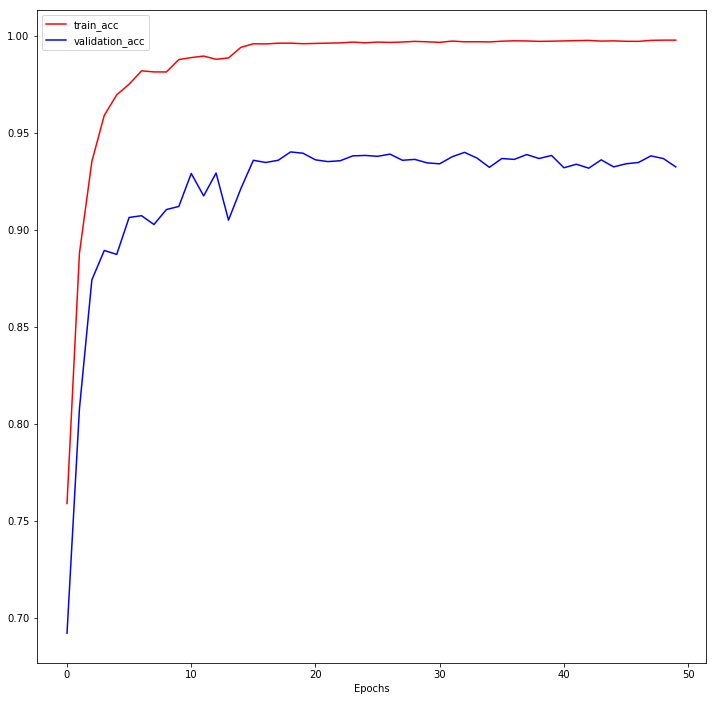

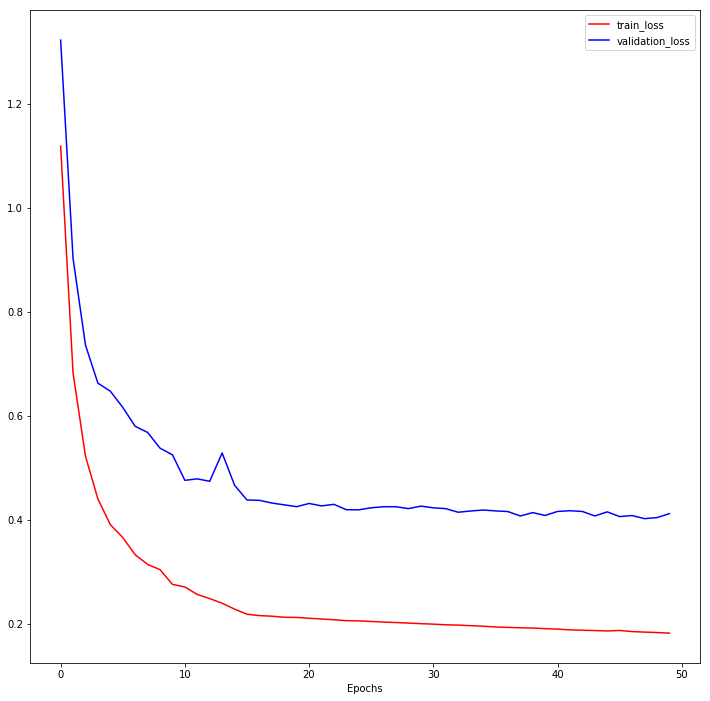

'\n# Print out results.\nfor k in sorted(acc_history):\n    train_accuracy, val_accuracy, valid_loss, train_loss = acc_history[(k)]\n    print(\'keep_prob %e train accuracy: %f val accuracy: %f validation loss: %f train loss %f\' % (k, train_accuracy, val_accuracy, valid_loss,                                                                         train_loss))\nprint("Best validation accuracy = {:.3f}".format(best_val_acc))\nprint("Corresponding keep prob {}".format(best_keep_prob))\n'

In [15]:
# drop out with ELU activation

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    EPOCHS = 50
    BATCH_SIZE = 256
    
    #learn_rate = [1e-2, 1e-3] #[1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
    #reg_parameter = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2] #[1e-2, 1e-4, 1e-6]
    # choose the best hyperparameter based on coarse search
    learn_rate = [1e-3]
    reg_parameter = [1e-3]
    keep_prob = [0.9] # chosen based on small run for 5 epochs and looking at validation error 
    Target_validation_acc = 0.92
    
    print("Training...")
    print()
    valacc, val_loss, trainacc, tr_loss = [], [], [], []
    #acc_history = {}
    #best_val_acc = -1
    #best_keep_prob = None
    
    for k in keep_prob:
        print()
        print("Keep probability : {}".format(k))
        for i in range(EPOCHS):
            print("Epoch :{}".format(i+1))
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                #print(batch_y.shape)
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, rate: learn_rate[0], reg_param: reg_parameter[0], keep_probability: k })
            
            # compute summary every 1 epochs
            if (i%1)==0 :
                validation_accuracy, valid_loss = evaluate(X_valid, y_valid, learn_rate[0], reg_parameter[0], keep_prob=1.0)
                training_accuracy, train_loss   = evaluate(X_train, y_train, learn_rate[0], reg_parameter[0], keep_prob=1.0)
                valacc.append(validation_accuracy)
                val_loss.append(valid_loss)
                trainacc.append(training_accuracy)
                tr_loss.append(train_loss)
                print()
                print("Validation Accuracy = {:.3f}".format(validation_accuracy))
                print("Training Accuracy = {:.3f}".format(training_accuracy))
                print("Validation Loss = {:.3f}".format(valid_loss))
                print("Training Loss = {:.3f}".format(train_loss))
                #acc_history[(k)] = (training_accuracy, validation_accuracy, valid_loss, train_loss)
                #if validation_accuracy > best_val_acc:
                #    best_keep_prob = k
                #    best_val_acc       = validation_accuracy
                # break if average validation accuracy for last 5 epochs meets target
                val = np.sum(valacc[-5:])/5
                if(val > Target_validation_acc):
                    learn_rate[0] = 1e-4
                    
                
                
        
        
    saver.save(sess, './TrafficSignClassifierNet')
    print("Model saved")
    
plt.figure(figsize=(12,12))
plt.plot(trainacc,'r',label='train_acc')
plt.plot(valacc,'b',label='validation_acc')
plt.xlabel('Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(12,12))
plt.plot(tr_loss,'r',label='train_loss')
plt.plot(val_loss,'b',label='validation_loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()   

'''
# Print out results.
for k in sorted(acc_history):
    train_accuracy, val_accuracy, valid_loss, train_loss = acc_history[(k)]
    print('keep_prob %e train accuracy: %f val accuracy: %f validation loss: %f train loss %f' % (k, train_accuracy, val_accuracy, valid_loss, \
                                                                        train_loss))
print("Best validation accuracy = {:.3f}".format(best_val_acc))
print("Corresponding keep prob {}".format(best_keep_prob))
'''

In [16]:
#Run testing
with tf.Session() as sess:
    saver.restore(sess, './TrafficSignClassifierNet')
    test_accuracy, _ = evaluate(X_test, y_test, 1e-3, 1e-3, 1.0)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.918


#### As seen above, with ELU activation, L2 regularization, drop out and w/o any data augmentation, using LeNet (lr: 1e-3, reg: 1e-3, keep_prob: 0.9, batch_size=256) and learning rate annealed to 1e-4 when validation accuracy>92%, we hit >93% average validation accuracy consistently. Test accuracy is 91.8%, not bad with vanilla LeNet and w/o any data augmentation

#### Next, lets try data augmentation to see if we achieve better validation accuracy using the same architecture and same hyperparameters

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [17]:
import matplotlib.image as mpimg

Image1 shape is :(750, 1000, 3)
Image2 shape is :(536, 800, 3)
Image3 shape is :(478, 359, 3)
Image4 shape is :(478, 359, 3)
Image5 shape is :(478, 359, 3)


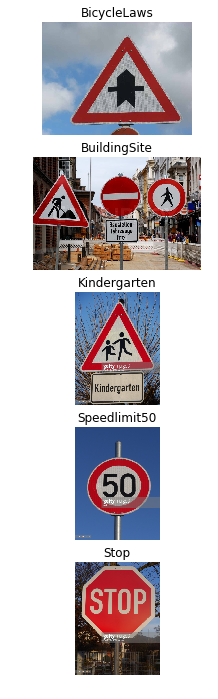

In [18]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
# 1st image
Image1 = '.\GermanTrafficSigns-Web\BicycleLaws.jpg'
Image2 = '.\GermanTrafficSigns-Web\BuildingSite.jpg'
Image3 = '.\GermanTrafficSigns-Web\Kindergarten.jpg'
Image4 = '.\GermanTrafficSigns-Web\Speedlimit50.jpg'
Image5 = '.\GermanTrafficSigns-Web\Stop.jpg'
im1 = mpimg.imread(Image1)
im2 = mpimg.imread(Image2)
im3 = mpimg.imread(Image3)
im4 = mpimg.imread(Image4)
im5 = mpimg.imread(Image5)
plt.figure(figsize=(12,12))
plt.subplot(511)
plt.imshow(im1)
plt.title('BicycleLaws')
plt.axis('off')
plt.subplot(512)
plt.imshow(im2)
plt.title('BuildingSite')
plt.axis('off')
plt.subplot(513)
plt.imshow(im3)
plt.title('Kindergarten')
plt.axis('off')
plt.subplot(514)
plt.imshow(im4)
plt.title('Speedlimit50')
plt.axis('off')
plt.subplot(515)
plt.imshow(im5)
plt.title('Stop')
plt.axis('off')
# print the shape of images
print("Image1 shape is :{}".format(im1.shape))
print("Image2 shape is :{}".format(im2.shape))
print("Image3 shape is :{}".format(im3.shape))
print("Image4 shape is :{}".format(im4.shape))
print("Image5 shape is :{}".format(im5.shape))

In [19]:
from PIL import Image
def resize_img(fname):
    img=Image.open(fname)
    width, height = img.size
    return img.resize((32,32))

### Predict the Sign Type for Each Image

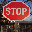

In [20]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
# re-size the image
image_list = []
image_list.append(resize_img(Image1))
image_list.append(resize_img(Image2))
image_list.append(resize_img(Image3))
image_list.append(resize_img(Image4))
image_list.append(resize_img(Image5))
image_list[4]  
    

In [40]:
def test_net(X_data, sess):
    pred_sign = sess.run(tf.argmax(logits, 1), feed_dict={x: X_data, keep_probability: 1.0})
    return pred_sign

X_test_data=[]
for i in range(5):
    X_test_data.append(normalize_features(image_list[i]))
    

with tf.Session() as sess:
    saver.restore(sess, './TrafficSignClassifierNet')
    signs_classes=test_net(X_test_data, sess)


In [41]:
print(signs_classes)

[11 18 31  7  9]


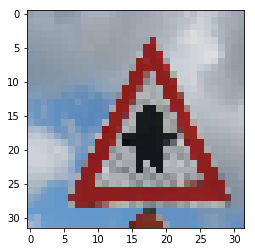

Original image is Bicycle laws
Network classified it as Right-of-way at the next intersection
Got it Right!


In [23]:
# first image is 
plt.imshow(image_list[0])
plt.show()
print("Original image is Bicycle laws")
NetworkClass = signames['SignName'].loc[signs_classes[0]]
print("Network classified it as {}".format(NetworkClass))
print("Got it Right!")

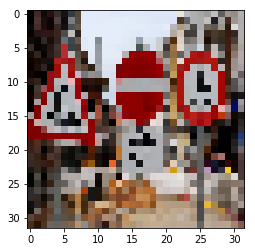

Original image is Building Site
Network classified it as General caution
Got it Wrong!
there are multiple signs in the image, network got confused since it is not trained on these dataset and fails to generalize


In [24]:
# second image is 
plt.imshow(image_list[1])
plt.show()
print("Original image is Building Site")
NetworkClass = signames['SignName'].loc[signs_classes[1]]
print("Network classified it as {}".format(NetworkClass))
print("Got it Wrong!")
print("there are multiple signs in the image, network got confused since it is not trained on these dataset and fails to generalize")

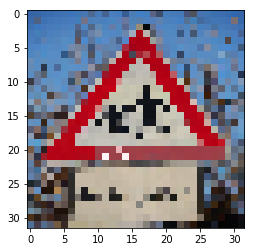

Original image is Kindergarten
Network classified it as Wild animals crossing
Got it wrong!


In [25]:
# third image is 
plt.imshow(image_list[2])
plt.show()
print("Original image is Kindergarten")
NetworkClass = signames['SignName'].loc[signs_classes[2]]
print("Network classified it as {}".format(NetworkClass))
print("Got it wrong but close!")


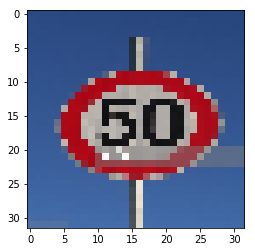

Original image is Speed limit 50
Network classified it as Speed limit (100km/h)
Got it Wrong! although it is a speed sign which is correctly recognized


In [26]:
# fourth image is 
plt.imshow(image_list[3])
plt.show()
print("Original image is Speed limit 50")
NetworkClass = signames['SignName'].loc[signs_classes[3]]
print("Network classified it as {}".format(NetworkClass))
print("Got it Wrong! although it is a speed sign which is correctly recognized")

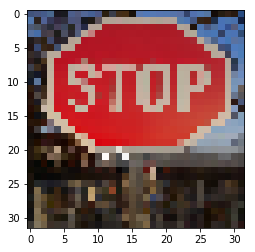

Original image is Stop Sign
Network classified it as No passing
Got it Wrong!
Network should have got it right since it is in the training set, may be the network didn't generalized well enough


In [27]:
# fifth image is 
plt.imshow(image_list[4])
plt.show()
print("Original image is Stop Sign")
NetworkClass = signames['SignName'].loc[signs_classes[4]]
print("Network classified it as {}".format(NetworkClass))
print("Got it Wrong!")
print("Network should have got it right since it is in the training set, may be the network didn't generalized well enough")

### Analyze Performance

In [35]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
print("Accuracy for these 5 new images is 20%")

Accuracy for these 5 new images is 20%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [28]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, './TrafficSignClassifierNet')
    prob = sess.run(tf.nn.softmax(logits), feed_dict={x: X_test_data, keep_probability: 1.0})    
    top_5 = sess.run(tf.nn.top_k(prob, k=5))

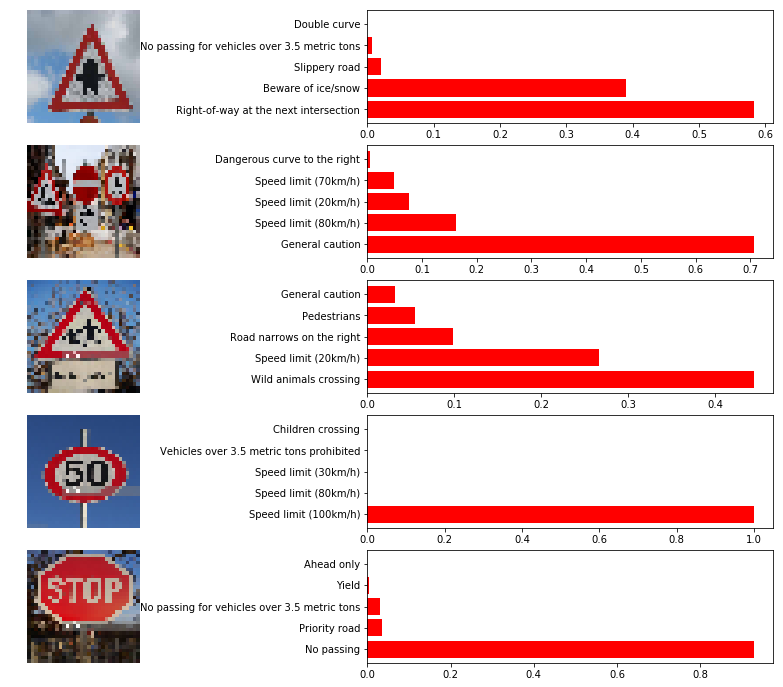

In [29]:
plt.figure(figsize=(16,12))
for i in range(5):
    plt.subplot(5,2,2*i+1)
    plt.imshow(image_list[i])
    plt.axis('off')
    plt.subplot(5,2,2*i+2)
    plt.barh(np.arange(1, 6, 1), top_5.values[i, :], color='red')
    labs=[signames['SignName'].loc[j] for j in top_5.indices[i]]
    plt.yticks(np.arange(1, 6, 1), labs)
plt.show()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understanding the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [30]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

import matplotlib.cm as cm

def outputFeatureMap(image_input, tf_activation, sess, activation_min=-1, activation_max=-1 ,plt_num=1, keep_prob=1.0):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input, keep_probability: keep_prob})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

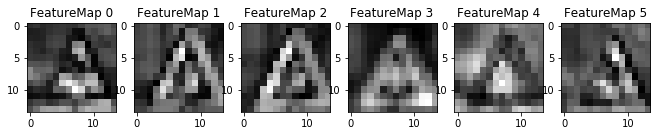

In [37]:
with tf.Session() as sess:
    saver.restore(sess, './TrafficSignClassifierNet')
    test_data = X_test_data[0]
    test_data = test_data[np.newaxis, :]
    outputFeatureMap(test_data, conv1, sess)

#### Try augmenting the training data to see if we can improve the accuracy with the same network achitecture
We will try augmenting the dataset by
1. Generating more data for each class (we genearte atleast 800 images per class by slight rotations, translation, shearing and brightness augmentation)
2. add a GRAY channel to every image in the training set

In [ ]:
# Load pickled data

# TODO: Fill this in based on where you saved the training and testing data

training_file   = './traffic-signs-data/train.p'
validation_file = './traffic-signs-data/valid.p'
testing_file    = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [ ]:
# generate augmented dataset
def gen_augmented_data(data, label, minexamples=800):
    '''
    This function creates atleast minexamples datapoints (default is 2000) for each class if the number of
    datapoints for the class is less than minexamples. Note in order to save the compute time, minexamples
    is set to 800 by default. This function internally calls another function defined at the starting of the 
    notebook [image_jittering(image, angle_range, trans_range, shear_range, brightnessflag)]
    '''
    # copy the original training data
    X_train_aug = data
    y_train_aug = label
    dist = np.bincount(label)
    for i,count in enumerate(dist):
        if count < minexamples:
            print("Generating {} additional datasets for class: {}".format(minexamples-count,i))
            for j in range(minexamples - count):
                # sample a datapoint corresponding to the current class
                indx = np.where(label==i)[0]
                sample_indx = np.random.choice(indx)
                datapoint = data[sample_indx]
                jittered_datapoint = image_jittering(datapoint, angle_range=20, trans_range=10, shear_range=2, brightnessflag=1)
                #print(jittered_datapoint[np.newaxis, :].shape)
                X_train_aug = np.vstack((X_train_aug, jittered_datapoint[np.newaxis, :]))
                y_train_aug = np.hstack((y_train_aug, i))
                #print(X_train_aug.shape)
                          
    return X_train_aug, y_train_aug
    
t0 = time.time()
X_train_aug, y_train_aug = gen_augmented_data(X_train, y_train) 
t1 = time.time()
print("Time taken for augmenting training dataset {}:".format(t1-t0))

In [ ]:
Generating 620 additional datasets for class: 0
Generating 440 additional datasets for class: 6
Generating 110 additional datasets for class: 14
Generating 260 additional datasets for class: 15
Generating 440 additional datasets for class: 16
Generating 620 additional datasets for class: 19
Generating 500 additional datasets for class: 20
Generating 530 additional datasets for class: 21
Generating 470 additional datasets for class: 22
Generating 350 additional datasets for class: 23
Generating 560 additional datasets for class: 24
Generating 260 additional datasets for class: 26
Generating 590 additional datasets for class: 27
Generating 320 additional datasets for class: 28
Generating 560 additional datasets for class: 29
Generating 410 additional datasets for class: 30
Generating 110 additional datasets for class: 31
Generating 590 additional datasets for class: 32
Generating 201 additional datasets for class: 33
Generating 440 additional datasets for class: 34
Generating 470 additional datasets for class: 36
Generating 620 additional datasets for class: 37
Generating 530 additional datasets for class: 39
Generating 500 additional datasets for class: 40
Generating 590 additional datasets for class: 41
Generating 590 additional datasets for class: 42
Time taken for augmenting training dataset 1035.9784314632416:

In [ ]:
# picke the augmented data set
import os
pickle_file = 'train-augmented-800.p'
if not os.path.isfile(pickle_file):
    print('Saving data to pickle file...')
    try:
        with open('train-augmented-800.p', 'wb') as pfile:
            pickle.dump(
                {
                    'train_aug_dataset': X_train_aug,
                    'train_aug_labels': y_train_aug,
            
                },
                pfile, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise

print('Data cached in pickle file.')

Saving data to pickle file...
Data cached in pickle file.

In [ ]:
# read the augmented training data from the pickle file
pickle_file = 'train-augmented-800.p'
with open(pickle_file, 'rb') as f:
  pickle_data = pickle.load(f)
  X_train_aug = pickle_data['train_aug_dataset']
  y_train_aug = pickle_data['train_aug_labels']
  del pickle_data  # Free up memory

print('Data and modules loaded.')

Data and modules loaded.

In [ ]:
# change colorspace
def change_colorspace(data):
    num = data.shape[0]
    data_YUV = []
    for i in range(num):
        data_YUV.append(cv2.cvtColor(data[i], cv2.COLOR_RGB2YUV))
    return data_YUV


In [ ]:
def add_channel(data):
    num = data.shape[0]
    data_new = np.zeros((num,32,32,4))
    for i in range(num):
        img_gray = cv2.cvtColor(data[i], cv2.COLOR_RGB2GRAY)
        data_new[i,:,:,0:3] = data[i]
        data_new[i,:,:,3] = img_gray
        
    return data_new

In [ ]:
X_train = add_channel(X_train)
X_valid = add_channel(X_valid)
X_test  = add_channel(X_test)

In [ ]:
X_train = normalize_features(X_train)
X_valid = normalize_features(X_valid)
X_test  = normalize_features(X_test)

In [ ]:
# drop out with ELU activation
### Define your architecture here.
### Feel free to use as many code cells as needed.


num_classes = 43

#Placeholders
x = tf.placeholder(tf.float32, (None, 32, 32, 4))
y = tf.placeholder(tf.int32, (None))
keep_probability = tf.placeholder(tf.float32)
rate = tf.placeholder(tf.float32, None)
reg_param = tf.placeholder(tf.float32, None)
one_hot_y = tf.one_hot(y, num_classes)

# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
mu = 0
sigma = 0.1

with tf.name_scope('conv1_layer'):
    #Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_w = tf.Variable(tf.truncated_normal(shape=(5, 5, 4, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.bias_add(tf.nn.conv2d(x, conv1_w, strides=[1, 1, 1, 1], padding='VALID'), conv1_b)
    #Activation.
    conv1   = tf.nn.elu(conv1)
    # drop out layer
    conv1   = tf.nn.dropout(conv1, keep_probability)
    # MAX Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1   = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

with tf.name_scope('conv2_layer'):
    #Layer 2: Convolutional. Input = 14x14x6. Output = 10x10x16.
    conv2_w = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.bias_add(tf.nn.conv2d(conv1, conv2_w, strides=[1, 1, 1, 1], padding='VALID'), conv2_b)    
    # Activation.
    conv2   = tf.nn.elu(conv2)
    # drop out layer
    conv2   = tf.nn.dropout(conv2, keep_probability)
    # MAX Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2   = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

with tf.name_scope('FC1_layer'):
    # Flatten. Input = 5x5x16. Output = 400.
    fc0     = flatten(conv2)
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_w   = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b   = tf.Variable(tf.zeros(120))
    fc1     = tf.add(tf.matmul(fc0, fc1_w), fc1_b)
    # Activation.
    fc1     = tf.nn.elu(fc1)
    # drop out layer
    fc1   = tf.nn.dropout(fc1, keep_probability)

with tf.name_scope('FC2_layer'):
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_w   = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b   = tf.Variable(tf.zeros(84))
    fc2     = tf.add(tf.matmul(fc1, fc2_w), fc2_b)
    # Activation.
    fc2     = tf.nn.elu(fc2)
    # drop out layer
    fc2   = tf.nn.dropout(fc2, keep_probability)

with tf.name_scope('SOFTMAX'):
    # Layer 5: Fully Connected. Input = 84. Output = num_classes.
    fc3_w   = tf.Variable(tf.truncated_normal(shape=(84, num_classes), mean = mu, stddev = sigma))
    fc3_b   = tf.Variable(tf.zeros(num_classes))
    logits  = tf.add(tf.matmul(fc2, fc3_w), fc3_b)
    
# create function to regularize the weights
def weight_regularization(weights, reg_param):
    reg_cost = 0.0
    for w in weights:
        reg_cost += reg_param*tf.nn.l2_loss(w)
    return reg_cost

# training pipeline
weights = [conv1_w, conv2_w, fc1_w, fc2_w, fc3_w]
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy) + weight_regularization(weights, reg_param)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# evaluation pipeline
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data, r, reg, keep_prob):
    num_examples = len(X_data)
    total_loss, total_accuracy = 0, 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss, accuracy = sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y, rate: r, reg_param: reg, keep_probability: keep_prob })
        total_accuracy += (accuracy * len(batch_x))
        total_loss     += (loss * len(batch_x))
    return total_accuracy / num_examples, total_loss / num_examples

In [ ]:
# drop out with ELU activation

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    EPOCHS = 50
    BATCH_SIZE = 256
    
    #learn_rate = [1e-2, 1e-3] #[1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
    #reg_parameter = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2] #[1e-2, 1e-4, 1e-6]
    # choose the best hyperparameter based on coarse search
    learn_rate = [1e-3]
    reg_parameter = [1e-3]
    keep_prob = [0.9] # chosen based on small run for 5 epochs and looking at validation error 
    Target_validation_acc = 0.92
    
    print("Training...")
    print()
    valacc, val_loss, trainacc, tr_loss = [], [], [], []
    #acc_history = {}
    #best_val_acc = -1
    #best_keep_prob = None
    
    for k in keep_prob:
        print()
        print("Keep probability : {}".format(k))
        for i in range(EPOCHS):
            print("Epoch :{}".format(i+1))
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                #print(batch_y.shape)
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, rate: learn_rate[0], reg_param: reg_parameter[0], keep_probability: k })
            
            # compute summary every 1 epochs
            if (i%1)==0 :
                validation_accuracy, valid_loss = evaluate(X_valid, y_valid, learn_rate[0], reg_parameter[0], keep_prob=1.0)
                training_accuracy, train_loss   = evaluate(X_train, y_train, learn_rate[0], reg_parameter[0], keep_prob=1.0)
                valacc.append(validation_accuracy)
                val_loss.append(valid_loss)
                trainacc.append(training_accuracy)
                tr_loss.append(train_loss)
                print()
                print("Validation Accuracy = {:.3f}".format(validation_accuracy))
                print("Training Accuracy = {:.3f}".format(training_accuracy))
                print("Validation Loss = {:.3f}".format(valid_loss))
                print("Training Loss = {:.3f}".format(train_loss))
                #acc_history[(k)] = (training_accuracy, validation_accuracy, valid_loss, train_loss)
                #if validation_accuracy > best_val_acc:
                #    best_keep_prob = k
                #    best_val_acc       = validation_accuracy
                # break if average validation accuracy for last 5 epochs meets target
                val = np.sum(valacc[-5:])/5
                if(val > Target_validation_acc):
                    learn_rate[0] = 1e-4
                
                
        
        
    saver.save(sess, './TrafficSignClassifierNet-Aug')
    print("Model saved")
    
plt.figure(figsize=(12,12))
plt.plot(trainacc,'r',label='train_acc')
plt.plot(valacc,'b',label='validation_acc')
plt.xlabel('Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(12,12))
plt.plot(tr_loss,'r',label='train_loss')
plt.plot(val_loss,'b',label='validation_loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()   


In [ ]:
Training...


Keep probability : 0.9
Epoch :1

Validation Accuracy = 0.714
Training Accuracy = 0.798
Validation Loss = 1.193
Training Loss = 1.016
Epoch :2

Validation Accuracy = 0.842
Training Accuracy = 0.904
Validation Loss = 0.833
Training Loss = 0.634
Epoch :3

Validation Accuracy = 0.871
Training Accuracy = 0.947
Validation Loss = 0.721
Training Loss = 0.499
Epoch :4

Validation Accuracy = 0.878
Training Accuracy = 0.963
Validation Loss = 0.689
Training Loss = 0.429
Epoch :5

Validation Accuracy = 0.898
Training Accuracy = 0.968
Validation Loss = 0.616
Training Loss = 0.386
Epoch :6

Validation Accuracy = 0.899
Training Accuracy = 0.975
Validation Loss = 0.617
Training Loss = 0.355
Epoch :7

Validation Accuracy = 0.915
Training Accuracy = 0.983
Validation Loss = 0.548
Training Loss = 0.324
Epoch :8

Validation Accuracy = 0.911
Training Accuracy = 0.975
Validation Loss = 0.545
Training Loss = 0.323
Epoch :9

Validation Accuracy = 0.921
Training Accuracy = 0.988
Validation Loss = 0.519
Training Loss = 0.290
Epoch :10

Validation Accuracy = 0.913
Training Accuracy = 0.984
Validation Loss = 0.518
Training Loss = 0.286
Epoch :11

Validation Accuracy = 0.926
Training Accuracy = 0.990
Validation Loss = 0.479
Training Loss = 0.262
Epoch :12

Validation Accuracy = 0.920
Training Accuracy = 0.991
Validation Loss = 0.492
Training Loss = 0.253
Epoch :13

Validation Accuracy = 0.924
Training Accuracy = 0.993
Validation Loss = 0.461
Training Loss = 0.235
Epoch :14

Validation Accuracy = 0.930
Training Accuracy = 0.995
Validation Loss = 0.446
Training Loss = 0.229
Epoch :15

Validation Accuracy = 0.934
Training Accuracy = 0.995
Validation Loss = 0.438
Training Loss = 0.227
Epoch :16

Validation Accuracy = 0.933
Training Accuracy = 0.995
Validation Loss = 0.437
Training Loss = 0.226
Epoch :17

Validation Accuracy = 0.930
Training Accuracy = 0.996
Validation Loss = 0.443
Training Loss = 0.224
Epoch :18

Validation Accuracy = 0.933
Training Accuracy = 0.995
Validation Loss = 0.438
Training Loss = 0.223
Epoch :19

Validation Accuracy = 0.929
Training Accuracy = 0.995
Validation Loss = 0.440
Training Loss = 0.221
Epoch :20

Validation Accuracy = 0.931
Training Accuracy = 0.996
Validation Loss = 0.438
Training Loss = 0.219
Epoch :21

Validation Accuracy = 0.927
Training Accuracy = 0.996
Validation Loss = 0.442
Training Loss = 0.218
Epoch :22

Validation Accuracy = 0.932
Training Accuracy = 0.996
Validation Loss = 0.439
Training Loss = 0.217
Epoch :23

Validation Accuracy = 0.930
Training Accuracy = 0.996
Validation Loss = 0.437
Training Loss = 0.215
Epoch :24

Validation Accuracy = 0.934
Training Accuracy = 0.996
Validation Loss = 0.430
Training Loss = 0.215
Epoch :25

Validation Accuracy = 0.931
Training Accuracy = 0.996
Validation Loss = 0.435
Training Loss = 0.213
Epoch :26

Validation Accuracy = 0.935
Training Accuracy = 0.996
Validation Loss = 0.428
Training Loss = 0.211
Epoch :27

Validation Accuracy = 0.931
Training Accuracy = 0.996
Validation Loss = 0.432
Training Loss = 0.210
Epoch :28

Validation Accuracy = 0.931
Training Accuracy = 0.996
Validation Loss = 0.430
Training Loss = 0.210
Epoch :29

Validation Accuracy = 0.931
Training Accuracy = 0.996
Validation Loss = 0.430
Training Loss = 0.208
Epoch :30

Validation Accuracy = 0.929
Training Accuracy = 0.996
Validation Loss = 0.431
Training Loss = 0.206
Epoch :31

Validation Accuracy = 0.931
Training Accuracy = 0.996
Validation Loss = 0.426
Training Loss = 0.206
Epoch :32

Validation Accuracy = 0.930
Training Accuracy = 0.996
Validation Loss = 0.428
Training Loss = 0.205
Epoch :33

Validation Accuracy = 0.926
Training Accuracy = 0.997
Validation Loss = 0.435
Training Loss = 0.203
Epoch :34

Validation Accuracy = 0.930
Training Accuracy = 0.997
Validation Loss = 0.437
Training Loss = 0.202
Epoch :35

Validation Accuracy = 0.930
Training Accuracy = 0.997
Validation Loss = 0.427
Training Loss = 0.201
Epoch :36

Validation Accuracy = 0.931
Training Accuracy = 0.997
Validation Loss = 0.422
Training Loss = 0.200
Epoch :37

Validation Accuracy = 0.932
Training Accuracy = 0.997
Validation Loss = 0.423
Training Loss = 0.199
Epoch :38

Validation Accuracy = 0.931
Training Accuracy = 0.997
Validation Loss = 0.422
Training Loss = 0.197
Epoch :39

Validation Accuracy = 0.930
Training Accuracy = 0.997
Validation Loss = 0.419
Training Loss = 0.196
Epoch :40

Validation Accuracy = 0.938
Training Accuracy = 0.997
Validation Loss = 0.413
Training Loss = 0.197
Epoch :41

Validation Accuracy = 0.931
Training Accuracy = 0.997
Validation Loss = 0.416
Training Loss = 0.194
Epoch :42

Validation Accuracy = 0.931
Training Accuracy = 0.997
Validation Loss = 0.421
Training Loss = 0.194
Epoch :43

Validation Accuracy = 0.928
Training Accuracy = 0.997
Validation Loss = 0.419
Training Loss = 0.193
Epoch :44

Validation Accuracy = 0.930
Training Accuracy = 0.997
Validation Loss = 0.421
Training Loss = 0.192
Epoch :45

Validation Accuracy = 0.926
Training Accuracy = 0.997
Validation Loss = 0.425
Training Loss = 0.191
Epoch :46

Validation Accuracy = 0.931
Training Accuracy = 0.997
Validation Loss = 0.416
Training Loss = 0.190
Epoch :47

Validation Accuracy = 0.931
Training Accuracy = 0.997
Validation Loss = 0.416
Training Loss = 0.189
Epoch :48

Validation Accuracy = 0.926
Training Accuracy = 0.997
Validation Loss = 0.423
Training Loss = 0.189
Epoch :49

Validation Accuracy = 0.930
Training Accuracy = 0.998
Validation Loss = 0.414
Training Loss = 0.187
Epoch :50

Validation Accuracy = 0.932
Training Accuracy = 0.997
Validation Loss = 0.416
Training Loss = 0.186
Model saved



In [ ]:
#Run testing
with tf.Session() as sess:
    saver.restore(sess, './TrafficSignClassifierNet-Aug')
    test_accuracy, _ = evaluate(X_test, y_test, 1e-3, 1e-3, 1.0)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

In [ ]:
Test Accuracy = 0.919